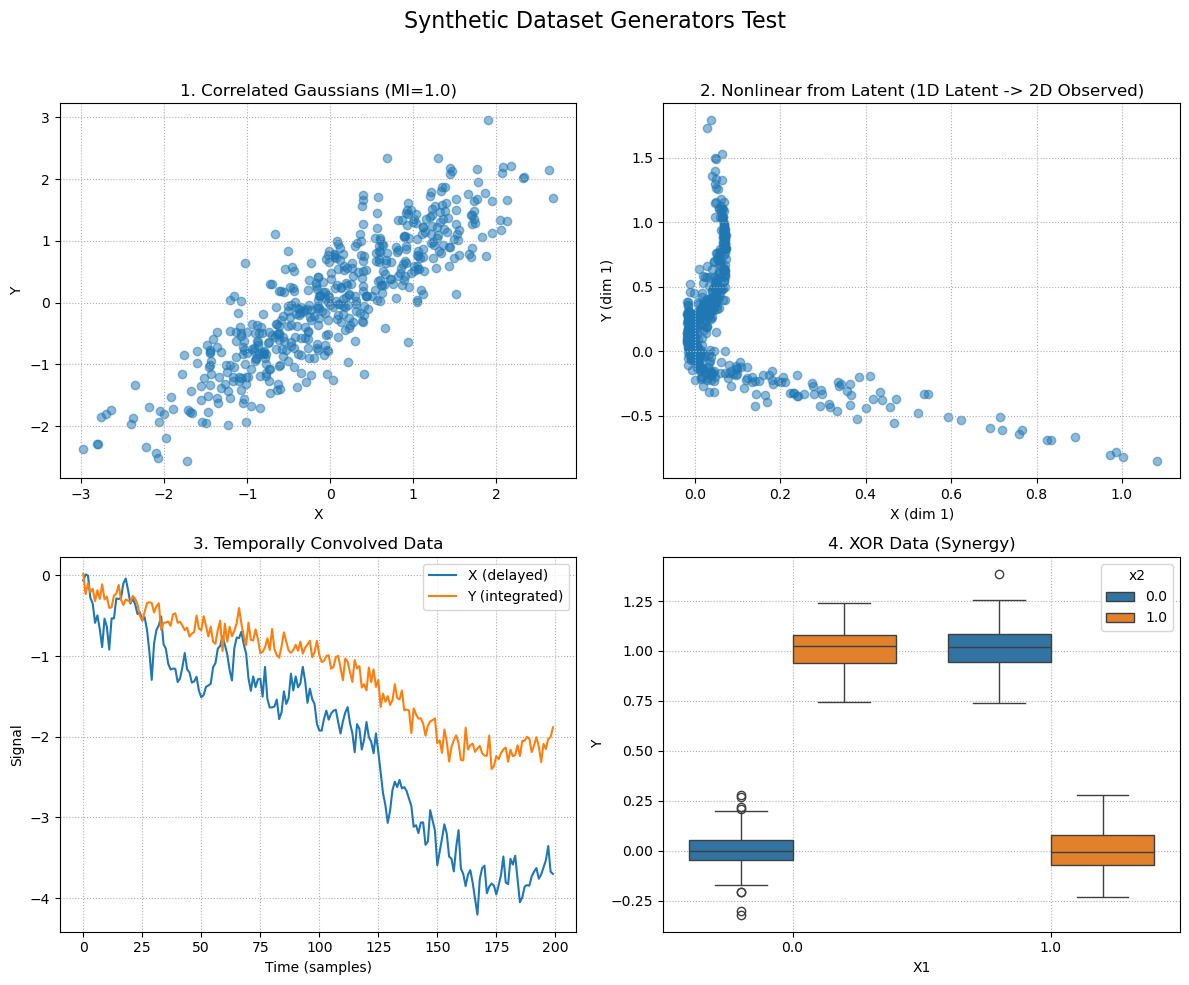


✅ All dataset generators created and tested successfully!


In [4]:
# test_datasets.ipynb

import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import all our new generator functions
from neural_mi.datasets.generators import (
    generate_correlated_gaussians,
    generate_nonlinear_from_latent,
    generate_temporally_convolved_data,
    generate_xor_data
)

# --- Create a multi-panel figure for visualization ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Synthetic Dataset Generators Test", fontsize=16)

# --- 1. Test Correlated Gaussians ---
x_gauss, y_gauss = generate_correlated_gaussians(n_samples=500, dim=1, mi=1.0)
assert x_gauss.shape == (500, 1) and y_gauss.shape == (500, 1)
axes[0, 0].scatter(x_gauss, y_gauss, alpha=0.5)
axes[0, 0].set_title("1. Correlated Gaussians (MI=1.0)")
axes[0, 0].set_xlabel("X")
axes[0, 0].set_ylabel("Y")
axes[0, 0].grid(True, linestyle=':')

# --- 2. Test Nonlinear from Latent ---
x_nl, y_nl = generate_nonlinear_from_latent(n_samples=500, latent_dim=1, observed_dim=2, mi=2.0)
assert x_nl.shape == (500, 2) and y_nl.shape == (500, 2)
axes[0, 1].scatter(x_nl[:, 0], y_nl[:, 0], alpha=0.5)
axes[0, 1].set_title("2. Nonlinear from Latent (1D Latent -> 2D Observed)")
axes[0, 1].set_xlabel("X (dim 1)")
axes[0, 1].set_ylabel("Y (dim 1)")
axes[0, 1].grid(True, linestyle=':')

# --- 3. Test Temporally Convolved Data ---
x_temp, y_temp = generate_temporally_convolved_data(n_samples=1000)
assert x_temp.shape == (1, 1000) and y_temp.shape == (1, 1000)
axes[1, 0].plot(x_temp.numpy().T[:200], label='X (delayed)')
axes[1, 0].plot(y_temp.numpy().T[:200], label='Y (integrated)')
axes[1, 0].set_title("3. Temporally Convolved Data")
axes[1, 0].set_xlabel("Time (samples)")
axes[1, 0].set_ylabel("Signal")
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle=':')

# --- 4. Test XOR Data ---
x_xor, y_xor = generate_xor_data(n_samples=500)
assert x_xor.shape == (500, 2) and y_xor.shape == (500, 1)
# Plot Y values based on the two binary X inputs
df_xor = pd.DataFrame({'x1': x_xor[:, 0], 'x2': x_xor[:, 1], 'y': y_xor[:, 0]})
sns.boxplot(x='x1', y='y', hue='x2', data=df_xor, ax=axes[1, 1])
axes[1, 1].set_title("4. XOR Data (Synergy)")
axes[1, 1].set_xlabel("X1")
axes[1, 1].set_ylabel("Y")
axes[1, 1].grid(True, linestyle=':')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n✅ All dataset generators created and tested successfully!")